# 01 - Préparation d'un jeu de données

On va faire un petit exemple de traitement de jeu de données avec *Pandas*.

On va charger un jeu de données classique en statistiques et en apprentissage machine : [des données sur des espèces de fleurs *iris*](https://en.wikipedia.org/wiki/Iris_flower_data_set).

Il s'agit d'un jeu de données qui regroupe la longueur (en cm) et la largeur (en cm) des pétales et des sépales pour trois sousespèces de fleurs iris, les *iris setosa*, les *iris versicolor* et les iris *virginica*.


[Ce cours d'apprentissage machine](https://codesignal.com/learn/courses/intro-to-unsupervised-machine-learning/lessons/exploring-and-visualizing-the-iris-dataset) offre une jolie visualisation de ce qu'on regarde :

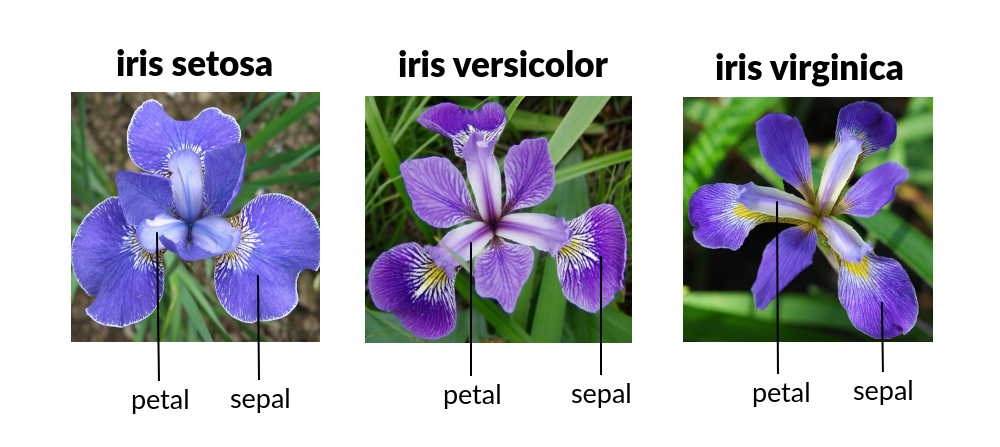

J'ai modifié un peu le jeu de données originales pour nous permettre de faire certains traitements dessus.

Commençons par importer les bibliothèques et charger le jeu de données :

In [ ]:
#@title Importations

import numpy as np
import pandas as pd
import plotly.express as px

In [ ]:
iris = pd.read_csv("https://raw.githubusercontent.com/316k/misc-data/master/iris-edit.csv")

## Analyse rapide

Commencez par afficher les données avec `display` et essayez de comprendre ce que le jeu de données contient dans chaque colonne.

Les caractéristiques sont : `num`, `sepal_length`, `sepal_width`, `petal_length`, `petal_width`, `plant`, `species`, `latitude`, `longitude`.

Faites également un `.describe()` pour avoir une idée générale de ce que le jeu de données contient.

**QUESTIONS**

A) Quelles sont les colonnes numériques? Quelles sont les colonnes non-numériques?

B) Dans le `describe()`, observez bien le `min` et le `max` des colonnes `xyz_length` et `xyz_width`. Expliquez ce qui cloche.

C) Est-ce qu'il y a des données manquantes? Comparez le `count` affiché pour chaque colonne avec le nombre total de lignes

In [ ]:
#@title Exercice 1

display(iris)
display(iris.describe())

,num,sepal_length,sepal_width,petal_length,petal_width,plant,species,latitude,longitude
0,1,5.6,2.5,3.9,1.1,iris,versicolor,48.658056,-65.752778
1,2,5.1,3.8,1.5,0.3,iris,setosa,48.658056,-65.752778
2,3,6.7,3.3,5.7,2.5,iris,virginica,48.658056,-65.752778
3,4,5.0,3.0,1.6,0.2,iris,setosa,48.658056,-65.752778
4,5,5.1,3.4,1.5,0.2,iris,setosa,48.658056,-65.752778
...,...,...,...,...,...,...,...,...,...
145,146,5.1,3.3,1.7,0.5,iris,setosa,48.658056,-65.752778
146,147,5.5,2.6,4.4,1.2,iris,VERSICOLOR,48.658056,-65.752778
147,148,6.1,2.6,5.6,1.4,iris,virginica,48.658056,-65.752778
148,149,4.9,3.1,1.5,0.1,iris,setosa,48.658056,-65.752778


,num,sepal_length,sepal_width,petal_length,petal_width,latitude,longitude
count,150.000000,150.000000,146.000000,146.000000,146.000000,1.500000e+02,1.500000e+02
mean,75.500000,9.209333,3.052740,3.822603,1.217123,4.865806e+01,-6.575278e+01
std,43.445368,41.172095,0.439309,1.744855,0.773381,1.497139e-13,1.425846e-14
min,1.000000,4.300000,2.000000,1.000000,-1.000000,4.865806e+01,-6.575278e+01
25%,38.250000,5.100000,2.800000,1.600000,0.300000,4.865806e+01,-6.575278e+01
50%,75.500000,5.800000,3.000000,4.400000,1.300000,4.865806e+01,-6.575278e+01
75%,112.750000,6.400000,3.300000,5.100000,1.800000,4.865806e+01,-6.575278e+01
max,150.000000,510.000000,4.400000,6.900000,2.500000,4.865806e+01,-6.575278e+01


**RÉPONSES**

A) On a:

- Colonnes numériques : `num`, `sepal/petal length/width` et `latitude/longitude`

- Colonnes textuelles : plan, species, size

B) le `max` de sepal_length est bizarrement à 510cm (5 mètres!)

Le min de `petal_width` est à -1, ce qui est également bizarre pour une largeur de pétale

C) On a 150 lignes, mais `sepal_width` `petal_length` `petal_width` n'ont que 146 valeurs entrées

## Colonnes avec des données manquantes

Affichez toutes les **caractéristiques** qui comportent au moins une valeur manquante (`NaN`), via du code.

Le résultat devrait avoir l'air de ça :

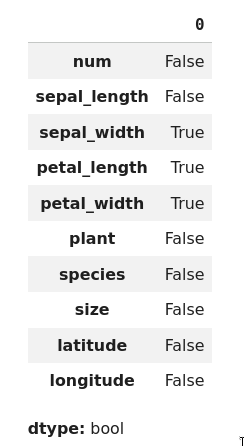

**Démarche à suivre :**

La fonction `isna()` retourne un tableau 2D de booléens (True/False) pour indiquer si chaque case est un `NaN`.

Si on a un `DataFrame`

```python
df = pd.DataFrame([
   [a, b,   c],
   [d, e, NaN],
   [f, NaN, g],
   [h, i,   j],
]
```

la fonction `.isna()` va nous retourner :


```python
df.isna() => DataFrame [
   [False, False, False],
   [False, False, True],
   [False, True, False],
   [False, False, False],
]
```

Essayez d'utiliser ce truc en python : des valeurs `True, False`, ça compte comme des `1, 0` quand on fait des maths dessus en python.

```python
True + False + False + True
=> 2
```

Vous pouvez additionner toutes les valeurs dans chaque colonne pour obtenir la réponse

In [ ]:
#@title Exercice 2

# On prend la somme, une colonne à la fois (mon_dataframe.sum() fait ça par défaut)
iris.isna().sum() > 0

,0
num,False
sepal_length,False
sepal_width,True
petal_length,True
petal_width,True
plant,False
species,False
latitude,False
longitude,False


## Observations avec des données manquantes

Refaites la même chose, mais affichez seulement les **observations** (ie, des lignes) qui ont des données manquantes.

Vous devriez finir avec un `DataFrame` de seulement 4 lignes, qui comporetnt toutes au moins des valeurs `NaN`.

&nbsp;

*Rappel* : la `.sum()` d'un `DataFrame` peut se faire colonne à colonne ou ligne à ligne, on peut spécifier un paramètre `axis=...` comme dans Numpy pour choisir

In [ ]:
#@title Exercice 3

# isna() donne un tableau 2D de valeurs True/False
cases_manquantes = iris.isna()
display(cases_manquantes)

# Ici, on prend la somme dans chaque ligne (chaque *colonne* du DataFrame est
# additionnée aux autres colonnes), ce qui donne une Series aussi longue que le
# nombre de lignes dans le DataFrame. La somme d'un paquet de True/False
# est équivalent à additionner des 0/1, donc on termine avec le nombre total
# de True par ligne (ie, le nombre de cases NaN par observation)
nb_manquantes_par_observation = cases_manquantes.sum(axis='columns')

# Finalement, on filtre le DataFrame original
# On garde seulement les lignes TEL QUE le nombre de cases manquantes est > 0
display(iris[nb_manquantes_par_observation > 0])

# Notez qu'on peut aussi le faire en une seule ligne :
display(iris[iris.isna().sum(axis='columns') > 0])

,num,sepal_length,sepal_width,petal_length,petal_width,plant,species,latitude,longitude
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
145,False,False,False,False,False,False,False,False,False
146,False,False,False,False,False,False,False,False,False
147,False,False,False,False,False,False,False,False,False
148,False,False,False,False,False,False,False,False,False


,num,sepal_length,sepal_width,petal_length,petal_width,plant,species,latitude,longitude
27,28,4.7,NaN,NaN,NaN,iris,setosa,48.658056,-65.752778
51,52,4.9,NaN,NaN,NaN,iris,setosa,48.658056,-65.752778
97,98,5.0,NaN,NaN,NaN,iris,setosa,48.658056,-65.752778
103,104,4.6,NaN,NaN,NaN,iris,setosa,48.658056,-65.752778


,num,sepal_length,sepal_width,petal_length,petal_width,plant,species,latitude,longitude
27,28,4.7,NaN,NaN,NaN,iris,setosa,48.658056,-65.752778
51,52,4.9,NaN,NaN,NaN,iris,setosa,48.658056,-65.752778
97,98,5.0,NaN,NaN,NaN,iris,setosa,48.658056,-65.752778
103,104,4.6,NaN,NaN,NaN,iris,setosa,48.658056,-65.752778


## Types de plantes

Les caractéristiques `plant` et `species` indiquent respectivement le type de plante et l'espèce.

**QUESTIONS**

A) Affichez le nombre de valeurs dans chaque case

B) Affichez un diagramme circulaire des données pour chacune de ces deux colonnes.

C) Que remarquez-vous au niveau de la colonne `plant`?

D) Que remarquez-vous au niveau de la colonne `species`?

In [ ]:
#@title Exercice 4 A)
especes = iris.species.value_counts()
plantes = iris.plant.value_counts()

display(especes)
display(plantes)

,count
species,
setosa,50
virginica,49
versicolor,46
VERSICOLOR,3
VERSICOLOR,1
VIRGINICA,1


,count
plant,
iris,150


In [ ]:
#@title Exercice 4 B)
display(px.pie(plantes, names=plantes.index, values="count", title="Plantes présentes dans le jeu de données"))
display(px.pie(especes, names=especes.index, values="count", title="Espèces présentes dans le jeu de données"))

**RÉPONSES**

**C)** Il y a une seule valeur présente, qui est toujours égale à *iris*. La colonne ne donne aucune information intéressante.

**D)** Il y a seulement trois sortes de plantes, mais on a 6 lignes. Il semble y avoir certaines valeurs en majuscules plutôt qu'en minuscules. Pandas les traite comme si c'était des valeurs différentes.


## Colonne `num`

La colonne `num` a l'air d'être seulement un numéro de ligne (1, 2, 3, 4, 5, 6, ..., 149, 150)

Écrivez du code qui confirme que c'est bien ça.

In [ ]:
#@title Exercice 5

### Si la colonne contient bien les valeurs (1, 2, 3, ... 150), on peut tester
### ça avec un autre tableau qu'on aura fait avec np.linspace ou np.arange,
### qui contient ça


# On génère le tableau avec des (1, 2, 3, ... 150)
nombres_1_a_150 = np.arange(1, 150 + 1)

# On compare notre tableau avec la colonne num
# On veut vérifier que c'est bien == pour toutes les cases (np.all())
np.all(iris.num == nombres_1_a_150)

np.True_

## Nettoyage des données

Avec les dernières questions, on peut se rendre compte que le jeu de données a des problèmes qui vont fausser nos analyses.

- Contient des colonnes superflues (`num` et `plant` ne disent rien d'intéressant)
- Contient des données invalides dans certaines lignes

On va adresser ces problèmes un à la fois.

Créez un second `DataFrame` nommé `iris2`, dans lequel vous :

- Supprimez les colonnes `num` et `plant`
- Supprimez les 4 lignes qui contiennent des `NaN`

Affichez le nouveau `DataFrame` et confirmez qu'il a bien 7 colonnes et 146 lignes

In [ ]:
#@title Exercice 6
iris2 = ...
#####

iris2 = iris.drop(['num', 'plant'], axis='columns')

# Supprimer toutes les colonnes qui contiennent des `NaN` est aussi simple que :
iris2 = iris2.dropna()

display(iris2)

,sepal_length,sepal_width,petal_length,petal_width,species,latitude,longitude
0,5.6,2.5,3.9,1.1,versicolor,48.658056,-65.752778
1,5.1,3.8,1.5,0.3,setosa,48.658056,-65.752778
2,6.7,3.3,5.7,2.5,virginica,48.658056,-65.752778
3,5.0,3.0,1.6,0.2,setosa,48.658056,-65.752778
4,5.1,3.4,1.5,0.2,setosa,48.658056,-65.752778
...,...,...,...,...,...,...,...
145,5.1,3.3,1.7,0.5,setosa,48.658056,-65.752778
146,5.5,2.6,4.4,1.2,VERSICOLOR,48.658056,-65.752778
147,6.1,2.6,5.6,1.4,virginica,48.658056,-65.752778
148,4.9,3.1,1.5,0.1,setosa,48.658056,-65.752778


On a noté des choses bizarres dans le `.describe()`, ce qui laissait croire qu'il y avait des erreurs d'entrée de données.

En particulier : il y a des valeurs négatives dans certaines colonnes supposées être notées en `cm`, et il y avait aussi des valeurs anormalement grandes (plusieurs mètres de large pour une plante iris, on peut présumer que ça ne se peut pas).

Commencez par dessiner deux nuages de points (`scatter`) :
- petal_length vs petal_width
- sepal_length vs sepal_width

Avec plotly, vous pouvez demander d'afficher de l'information spécifique quand on passe la souris par-dessus un point avec:

```python
  px.scatter(..., hover_name="nom de colonne ou Series")
```

Pour voir l'index d'un certain point sur le graphique, on peut utiliser :

```python
  px.scatter(df, x='colonne1', y='colonne2', hover_name=df.index)
```

En passant la souris par-dessus un point du graphique, on verra alors en popup l'index de l'observation correspondante :

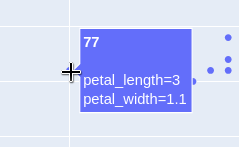

Inspectez bien les données et dites quels sont les indexes des observations qui ont des valeurs absurdes.

In [ ]:
#@title Exercice 7.1
### Faites un scatter de petal_length vs petal_width en affichant l'index comme hover_name
px.scatter(iris2, x='petal_length', y='petal_width', hover_name=iris2.index)

In [ ]:
#@title Exercice 7.2
### Faites la même chose, mais avec les sepales
px.scatter(iris2, x='sepal_length', y='sepal_width', hover_name=iris2.index)

**RÉPONSES**

- L'index **83** a une `sepal_length` de 510
- L'index **70** a une `petal_length` de -1

On va corriger ça.

Créez un autre `DataFrame` nommé `iris3`, qui repart d'`iris2` et dans lequel vous supprimez les observations problématiques trouvées.

Vous devriez en avoir trouvé 2.

Affichez le `DataFrame` trouvé.

In [ ]:
#@title Exercice 8
iris3 = ...
######

iris3 = iris2.drop([83, 70], axis='index')

display(iris3)

,sepal_length,sepal_width,petal_length,petal_width,species,latitude,longitude
0,5.6,2.5,3.9,1.1,versicolor,48.658056,-65.752778
1,5.1,3.8,1.5,0.3,setosa,48.658056,-65.752778
2,6.7,3.3,5.7,2.5,virginica,48.658056,-65.752778
3,5.0,3.0,1.6,0.2,setosa,48.658056,-65.752778
4,5.1,3.4,1.5,0.2,setosa,48.658056,-65.752778
...,...,...,...,...,...,...,...
145,5.1,3.3,1.7,0.5,setosa,48.658056,-65.752778
146,5.5,2.6,4.4,1.2,VERSICOLOR,48.658056,-65.752778
147,6.1,2.6,5.6,1.4,virginica,48.658056,-65.752778
148,4.9,3.1,1.5,0.1,setosa,48.658056,-65.752778


On a vu plus haut que la colonne `species` était parfois mal écrite.

Créez un nouveau `DataFrame` nommé `iris4`, qui repart d'`iris3` et qui remplace la colonne `species` par une colonne dont toutes les lignes sont l'une des trois valeurs possibles, bien écrites :

- En minuscules
- Sans espaces au début ou à la fin (utilisez: `texte.strip()` pour enlever les espaces au début et à la fin)

Pour remplacer une colonne existante, la méthode `.assign(col=...)` peut être utilisée.

In [ ]:
#@title Exercice 9
iris4 = ...
#######

valeurs_bien_ecrites = []

for i, ligne in iris3.iterrows():
  valeur = ligne.species.strip().lower()
  valeurs_bien_ecrites.append(valeur)

iris4 = iris3.assign(species=valeurs_bien_ecrites)

display(iris4)

,sepal_length,sepal_width,petal_length,petal_width,species,latitude,longitude
0,5.6,2.5,3.9,1.1,versicolor,48.658056,-65.752778
1,5.1,3.8,1.5,0.3,setosa,48.658056,-65.752778
2,6.7,3.3,5.7,2.5,virginica,48.658056,-65.752778
3,5.0,3.0,1.6,0.2,setosa,48.658056,-65.752778
4,5.1,3.4,1.5,0.2,setosa,48.658056,-65.752778
...,...,...,...,...,...,...,...
145,5.1,3.3,1.7,0.5,setosa,48.658056,-65.752778
146,5.5,2.6,4.4,1.2,versicolor,48.658056,-65.752778
147,6.1,2.6,5.6,1.4,virginica,48.658056,-65.752778
148,4.9,3.1,1.5,0.1,setosa,48.658056,-65.752778


Confirmez que vous avez seulement trois valeurs. Refaites le diagramme circulaire que vous aviez fait plus haut pour votre nouveau `DataFrame`.

**QUESTION** Dans cette version nettoyée du jeu de données, y a-t-il autant de plantes dans chacune des espèces?

In [ ]:
#@title Exercice 10
especes_nettoyees = iris4.species.value_counts()
display(px.pie(especes_nettoyees, names=especes_nettoyees.index, values="count", title="Espèces présentes dans iris4"))

**RÉPONSE**

Non, il y a un peu moins de plantes `setosa` que du reste.

## Ajout de nouvelles colonnes

On peut souvent extrapoler des **nouvelles caractéristiques** à partir des données fournies.

Dans le cas des plantes iris, on a la largeur (`width` en `cm`) et la longueur (`length` en `cm`) des pétales et sépales. On pourrait créer des nouvelles colonnes `petal_aire` et `sepal_aire`, qui donneraient l'aire en `cm²` des pétales et sépales des plantes.

Si on regarde à nouveau nos images de pétales et de sépales :

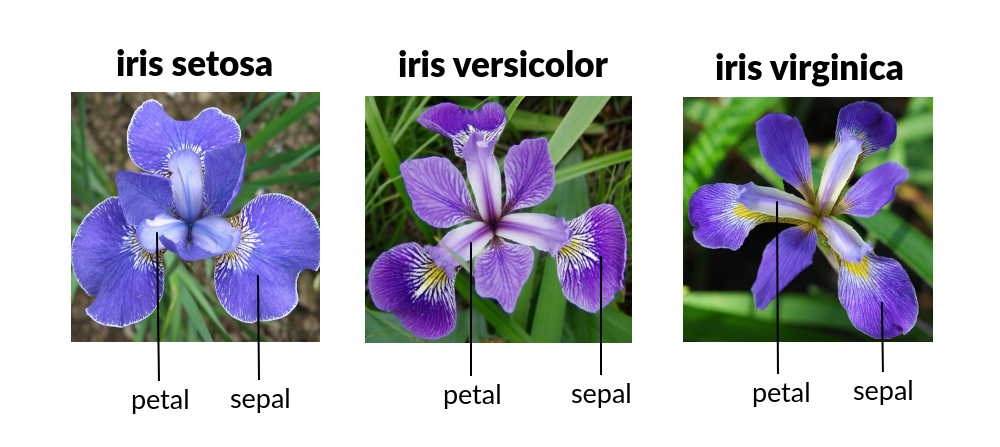

Les pétales pourraient être approximés par des rectangles, et les sépales par des ellipses.

La formule de l'aire d'un rectangle est :

$$\text{aire}_\text{rectangle}\text{(longueur, largeur)} = \text{longueur} \times \text{largeur}$$

La formule de l'air d'une ellipse est :

$$\text{aire}_\text{ellipse}\text{(longueur, largeur)} = \frac{\pi}{4} \text{longueur} \times \text{largeur}$$

Repartez de `iris4` et créez un nouveau `DataFrame` nommé `iris5` qui contient deux nouvelles colonnes nommées `petal_aire` et `sepal_aire`.

Affichez le nouveau `DataFrame` pour vérifier le résultat


In [ ]:
#@title Exercice 11
iris5 = ...

#######

sepal_aires = []
petal_aires = []

for i, ligne in iris4.iterrows():
    sepal_aires.append(np.pi / 4 * ligne.sepal_length * ligne.sepal_width)
    petal_aires.append(ligne.petal_length * ligne.petal_width)

iris5 = iris4.assign(sepal_aire=sepal_aires, petal_aire=petal_aires)
iris5

,sepal_length,sepal_width,petal_length,petal_width,species,latitude,longitude,sepal_aire,petal_aire
0,5.6,2.5,3.9,1.1,versicolor,48.658056,-65.752778,10.995574,4.29
1,5.1,3.8,1.5,0.3,setosa,48.658056,-65.752778,15.221016,0.45
2,6.7,3.3,5.7,2.5,virginica,48.658056,-65.752778,17.365153,14.25
3,5.0,3.0,1.6,0.2,setosa,48.658056,-65.752778,11.780972,0.32
4,5.1,3.4,1.5,0.2,setosa,48.658056,-65.752778,13.618804,0.30
...,...,...,...,...,...,...,...,...,...
145,5.1,3.3,1.7,0.5,setosa,48.658056,-65.752778,13.218251,0.85
146,5.5,2.6,4.4,1.2,versicolor,48.658056,-65.752778,11.231194,5.28
147,6.1,2.6,5.6,1.4,virginica,48.658056,-65.752778,12.456415,7.84
148,4.9,3.1,1.5,0.1,setosa,48.658056,-65.752778,11.930198,0.15


# 02 - Utiliser les données préparées pour apprendre quelque chose

Qu'est-ce qu'on peut **apprendre** de toutes ces données?

On se peut poser des questions comme :

- À quoi ressemble une plante iris moyenne?
- Pour une espèce donnée, de quoi a l'air le ratio entre les longueurs/largeurs des sépales et pétales?
- Quelle est la relation entre les dimensions des sépales/pétales et l'espèce?
- Sachant les dimensions des pétales et/ou sépales d'une plante iris, peut-on deviner la sorte d'espèce?

## Interpréter quelques statistiques

Dans les derniers chapitres, on a calculé la moyenne, l'écart-type et la variance de données, mais on n'a pas parlé de ce que ça veut dire.

La **moyenne** est une mesure de la **tendence centrale** des données. Les données sont réparties autour de quelle valeur? Quel est le "centre" des données?

L'**écart-type** et la **variance** sont deux mesures différentes de la même chose. Ça mesure la **dispersion** des données : à quel point les données sont éloignées ou rapprochées du centre? (ie, éloignées ou rapprochées de la moyenne)

On va visualiser ces valeurs sur le jeu de données.

Commencez par ré-afficher un `.describe()` des données sur le dernier dataframe `iris5` :

In [ ]:
iris5.describe()

,sepal_length,sepal_width,petal_length,petal_width,latitude,longitude,sepal_aire,petal_aire
count,144.000000,144.000000,144.000000,144.000000,1.440000e+02,1.440000e+02,144.000000,144.000000
mean,5.880556,3.043750,3.854167,1.239583,4.865806e+01,-6.575278e+01,14.030920,6.021042
std,0.822607,0.434961,1.735958,0.751243,1.426046e-13,1.426046e-14,2.662243,4.673380
min,4.300000,2.000000,1.000000,0.100000,4.865806e+01,-6.575278e+01,7.853982,0.110000
25%,5.175000,2.800000,1.600000,0.375000,4.865806e+01,-6.575278e+01,12.299335,0.517500
50%,5.800000,3.000000,4.400000,1.350000,4.865806e+01,-6.575278e+01,13.870132,5.915000
75%,6.400000,3.300000,5.100000,1.800000,4.865806e+01,-6.575278e+01,16.022123,9.825000
max,7.900000,4.400000,6.900000,2.500000,4.865806e+01,-6.575278e+01,23.577653,15.870000


Si tout est bon, vous devriez voir :

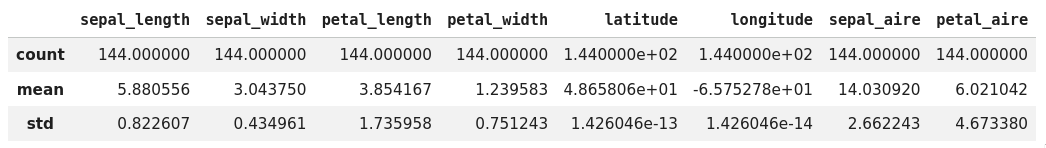

## Visualiser la moyenne

Regardons les deux premières caractéristiques :

- **`sepal_width`** : *mean* (moyenne) = 3.04
- **`sepal_length`** :  *mean* (moyenne) = 5.88

La moyenne devrait correspondre **à la tendence centrale des données** : les données devraient être distribuées à gauche et à droite de cette valeur.

On peut le voir sur l'histogramme des deux colonnes.

Les valeurs de `sepal_width` (en $\color{red}{rouge}$) sont plus basses, centrées autour de 3.04.

Les valeurs de `sepal_length` (en $\color{blue}{bleu}$) sont plus élevées, centrées autour de 5.88.

In [ ]:
#@title Visualisation des moyennes pour sepal_width et sepal_length
# NOTE: Vous voyez ici que plotly permet de produire des dessins avancés.
# Je ne vous demanderai pas d'être capables de refaire ça vous-mêmes dans un examen :-)
histogramme1 = px.histogram(iris5, x="sepal_width",
                            nbins=50,
                            color_discrete_sequence=['red'])
histogramme2 = px.histogram(iris5, x="sepal_length",
                            nbins=50, color_discrete_sequence=['blue'])

from plotly.graph_objects import Figure
fig = Figure(data=histogramme1.data + histogramme2.data)
fig.update_xaxes(range=[0, 10])
fig.update_yaxes(range=[0, 37])

# Ligne sur la moyenne de `sepal_width`
fig.add_vline(x=3.04, line_width=3, line_dash="dash", line_color="darkred")
# Ligne sur la moyenne de `sepal_length`
fig.add_vline(x=5.88, line_width=3, line_dash="dash", line_color="darkblue")
fig

## Visualiser l'écart-type

Les valeurs sont  :

- **`sepal_width`** : *std* (écart-type) = 0.43
- **`sepal_length`** : *std* (écart-type) = 0.82

&nbsp;

L'écart-type est une mesure de la **dispersion des données**. Plus la valeur est élevée, plus les données ont tendence à s'éparpiller loin de la moyenne.

Sur l'histogramme, on devrait donc voir que `sepal_width` est moins éparpillé horizontalement que `sepal_length`.

*Sous certaines conditions*, on peut s'attendre à ce que 95% des données soient à l'intérieur de l'intervalle

$$\text{moyenne} ± 1.96*\text{écart-type}$$

In [ ]:
#@title Visualisation de l'écart-type pour sepal_width et sepal_length
histogramme1 = px.histogram(iris5, x="sepal_width",
                            nbins=50,
                            color_discrete_sequence=['red'])
histogramme2 = px.histogram(iris5, x="sepal_length",
                            nbins=50, color_discrete_sequence=['blue'])

from plotly.graph_objects import Figure
fig = Figure(data=histogramme1.data + histogramme2.data)
fig.update_xaxes(range=[0, 10])
fig.update_yaxes(range=[0, 37])

# Carré rouge: centre de `sepal_width` ± 1.96*écart-type
fig.add_shape(type="rect",
        x0=3.04 - 1.96 * 0.43, x1=3.04 + 1.96 * 0.43,
        y0=0, y1=37,
        fillcolor="red", opacity=0.2)
# Carré bleu: centre de `sepal_length` ± 1.96*écart-type
fig.add_shape(
        type="rect",
        x0=5.88 - 1.96 * 0.82, x1=5.88 + 1.96 * 0.82,
        y0=0, y1=37,
        fillcolor="blue", opacity=0.2)
fig

## Exercice

**QUESTION**: Regardez de plus près l'écart-type des colonnes `latitude` et `longitude`.

Que remarquez-vous?

Dessinez également un nuage de points de ces deux colonnes ensemble pour vous donner un indice.

In [ ]:
#@title Exercice 12

display(iris5.latitude.std()) # presque zéro, à une mini erreur d'arrondi près
display(iris5.longitude.std()) # presque zéro, à une mini erreur d'arrondi près

px.scatter(iris5, x="latitude", y="longitude")

1.426045645315112e-13

1.4260456453151123e-14

**RÉPONSE**

L'écart-type de ces deux caractéristiques est de 0.

Ça implique qu'il n'y a **aucune dispersion des données : elles sont toutes exactement égales**.


Pour la suite, créez un autre `DataFrame` nommé `iris6` qui supprime ces deux colonnes de `iris5`

In [ ]:
#@title Exercice 13
iris6 = ...
#####
iris6 = iris5.drop(['latitude', 'longitude'], axis='columns')
display(iris6)

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_aire,petal_aire
0,5.6,2.5,3.9,1.1,versicolor,10.995574,4.29
1,5.1,3.8,1.5,0.3,setosa,15.221016,0.45
2,6.7,3.3,5.7,2.5,virginica,17.365153,14.25
3,5.0,3.0,1.6,0.2,setosa,11.780972,0.32
4,5.1,3.4,1.5,0.2,setosa,13.618804,0.30
...,...,...,...,...,...,...,...
145,5.1,3.3,1.7,0.5,setosa,13.218251,0.85
146,5.5,2.6,4.4,1.2,versicolor,11.231194,5.28
147,6.1,2.6,5.6,1.4,virginica,12.456415,7.84
148,4.9,3.1,1.5,0.1,setosa,11.930198,0.15


## Variance

L'écart-type est défini comme la racine carrée de la variance. Plus la variance est grande, plus l'écart-type l'est aussi.

Il n'y a pas vraiment d'interprétation graphique simple de la variance, ni d'interprétation facile si on voit que la variance est de `5.218`.

On peut cependant déduire comme pour l'écart-type :

- Plus la variance est grande, plus les données sont éparpillées loin du centre
- Une variance proche de 0 $\implies$ les données sont très rapprochées du centre

On peut calculer la variance dans `pandas` avec `series.var()`

## **Corrélation** entre des caractéristiques

La **corrélation** dans un jeu de données est une mesure du lien qui unit deux caractéristiques : à quel point les données *varient ensemble*, ou à quel point elles sont reliées l'une à l'autre.

Des caractéristiques qui ne seraient *pas corrélées* seraient complètement indépendantes l'une de l'autre.

Quand des caractéristiques sont corrélées, la connaissance d'une valeur peut aider à deviner l'autre.

&nbsp;

Quelques exemples :

- Il y a une **très forte corrélation** entre le nombre de ml de Mountain Dew bu dans une journée et la quantité totale de sucre ingérée
    - Plus on boit de Mountain Dew, plus on ingère de sucre
- Il y a généralement une **bonne corrélation** entre le nombre d'heures passées à étudier et le nombre de points perdus dans un examen
    - Plus on travaille, moins on fait d'erreurs
- Il y a une **certaine corrélation** entre la température extérieure en degrés et le nombre de lunettes soleil vendues dans la journée
    - Plus il faut soleil, plus les gens achètent des lunettes
- Il y a une **certaine corrélation** entre la taille d'une personne en cm et son âge
    - Plus une personne est jeune (ex.: 3 ans), plus elle est petite
- Il n'y a **pas vraiment de corrélation** entre le nombre de lettres dans le nom d'une personne et sa taille en cm
    - La connaissance de l'un ne donne aucun indice sur l'autre
- Il n'y a **pas vraiment de corrélation** entre l'âge d'une personne et son nombre de doigts

&nbsp;

Notez que la corrélation n'implique pas nécessairement que l'*un cause l'autre*.

Par exemple :

- Il y a une **forte corrélation** entre le nombre de noyades pendant une journée et le nombre de lunettes soleil vendues.
    - Savoir qu'on a vendu beaucoup de lunettes soleil aide à deviner qu'il y aura plus de noyades qu'une journée où on n'en n'aurait pas vendu du tout

Dans le dernier exemple, on peut estimer une valeur à partir de l'autre, mais *tenter de modifier une valeur* n'affectera probablement pas l'autre. Si on interdisait la vente des lunettes soleil, ça aurait probablement très peu d'effet sur les noyades.

## Visualiser la corrélation

Pour voir si une corrélation existe entre des données, on peut les regarder visuellement avec un **nuage de points en 2D**.

Si ça semble possible de tracer une ligne parmi les points, c'est qu'il y a une certaine corrélation entre les deux caractéristiques choisies.

Dans notre `DataFrame` `iris6`, on devrait voir que la largeur et la longueur des pétales sont corrélées : on dirait qu'on peut tracer une ligne entre les deux.

**Plus la largeur d'un pétale est grande, plus sa longueur l'est aussi.**

In [ ]:
px.scatter(iris6, x="petal_width", y="petal_length", range_x=[0, 4], range_y=[0,8])


**QUESTION** : en regardant le graphique ci-haut, estimez la longueur ou la largeur d'un pétale en fonction de l'autre :

A) Si `petal_width=0.4cm`, alors `petal_length=?`

B) Si `petal_width=2.5cm`, alors `petal_length=?`

C) Si `petal_length=3cm`, alors `petal_width=?`

**RÉPONSES**

A) En regardant les données similaires dans le graphique, on pourrait dire que `petal_width=0.4cm` correspond à environ `petal_length≈1.5cm`

B) Similairement, `petal_width=2.5cm` donne autour de `petal_length≈6cm`

C) Ici, on n'a pas de points correspondants, mais on pourrait deviner en regardant les points que si un pétale avait une `length=3cm` sur l'axe des Y, ça nous amènerait autour de `width≈0.75cm` sur l'axe des X

## Pas de corrélation

À l'inverse, il ne semble pas y avoir de lien évident entre la largeur et la hauteur des sépales.

Savoir que la largeur (width) d'un sépal est de 3cmn ne nous aide pas vraiment à deviner sa longueur (length).

Le nuage de points a alors l'air d'un vrai nuage, plutôt qu'une ligne.

In [ ]:
px.scatter(iris5, x="sepal_width", y="sepal_length", range_x=[0, 6], range_y=[0,12])

## Calculer la corrélation

On peut quantifier la corrélation avec une valeur entre `-1` et `+1`.

Pandas peut faire le calcul avec :

In [ ]:
# Corrélation entre `petal_length` et `petal_width`
display(iris5.petal_length.corr(iris5.petal_width))

# On extrait certaines colonnes intéressantes
df_petales_sepales = iris5[['sepal_length','sepal_width','petal_length','petal_width']]

# Corrélation entre toutes les colonnes 2-à-2 du DataFrame donné
display(df_petales_sepales.corr())

np.float64(0.9601651276120956)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.096305,0.866096,0.808421
sepal_width,-0.096305,1.000000,-0.412697,-0.347966
petal_length,0.866096,-0.412697,1.000000,0.960165
petal_width,0.808421,-0.347966,0.960165,1.000000


Une valeur de corrélation entre une caractéristique $X$ et une caractéristique $Y$ est toujours située entre `-1` et `+1`.

- `+1` La corrélation est **forte** et **positive**. Quand $X$ augmente, $Y$ augmente aussi.
- `0` Il n'y a aucune corrélation, les caractéristiques sont complètement indépendantes l'une de l'autre
- `-1`: La corrélation est **forte** mais **négative**. Quand $X$ augmente, $Y$ diminue.

Une corrélation est faible quand elle est proche de zéro (positive ou négative).

&nbsp;

Voici une petite visualisation des nuages de points correspondants pour différentes valeurs de corrélation :

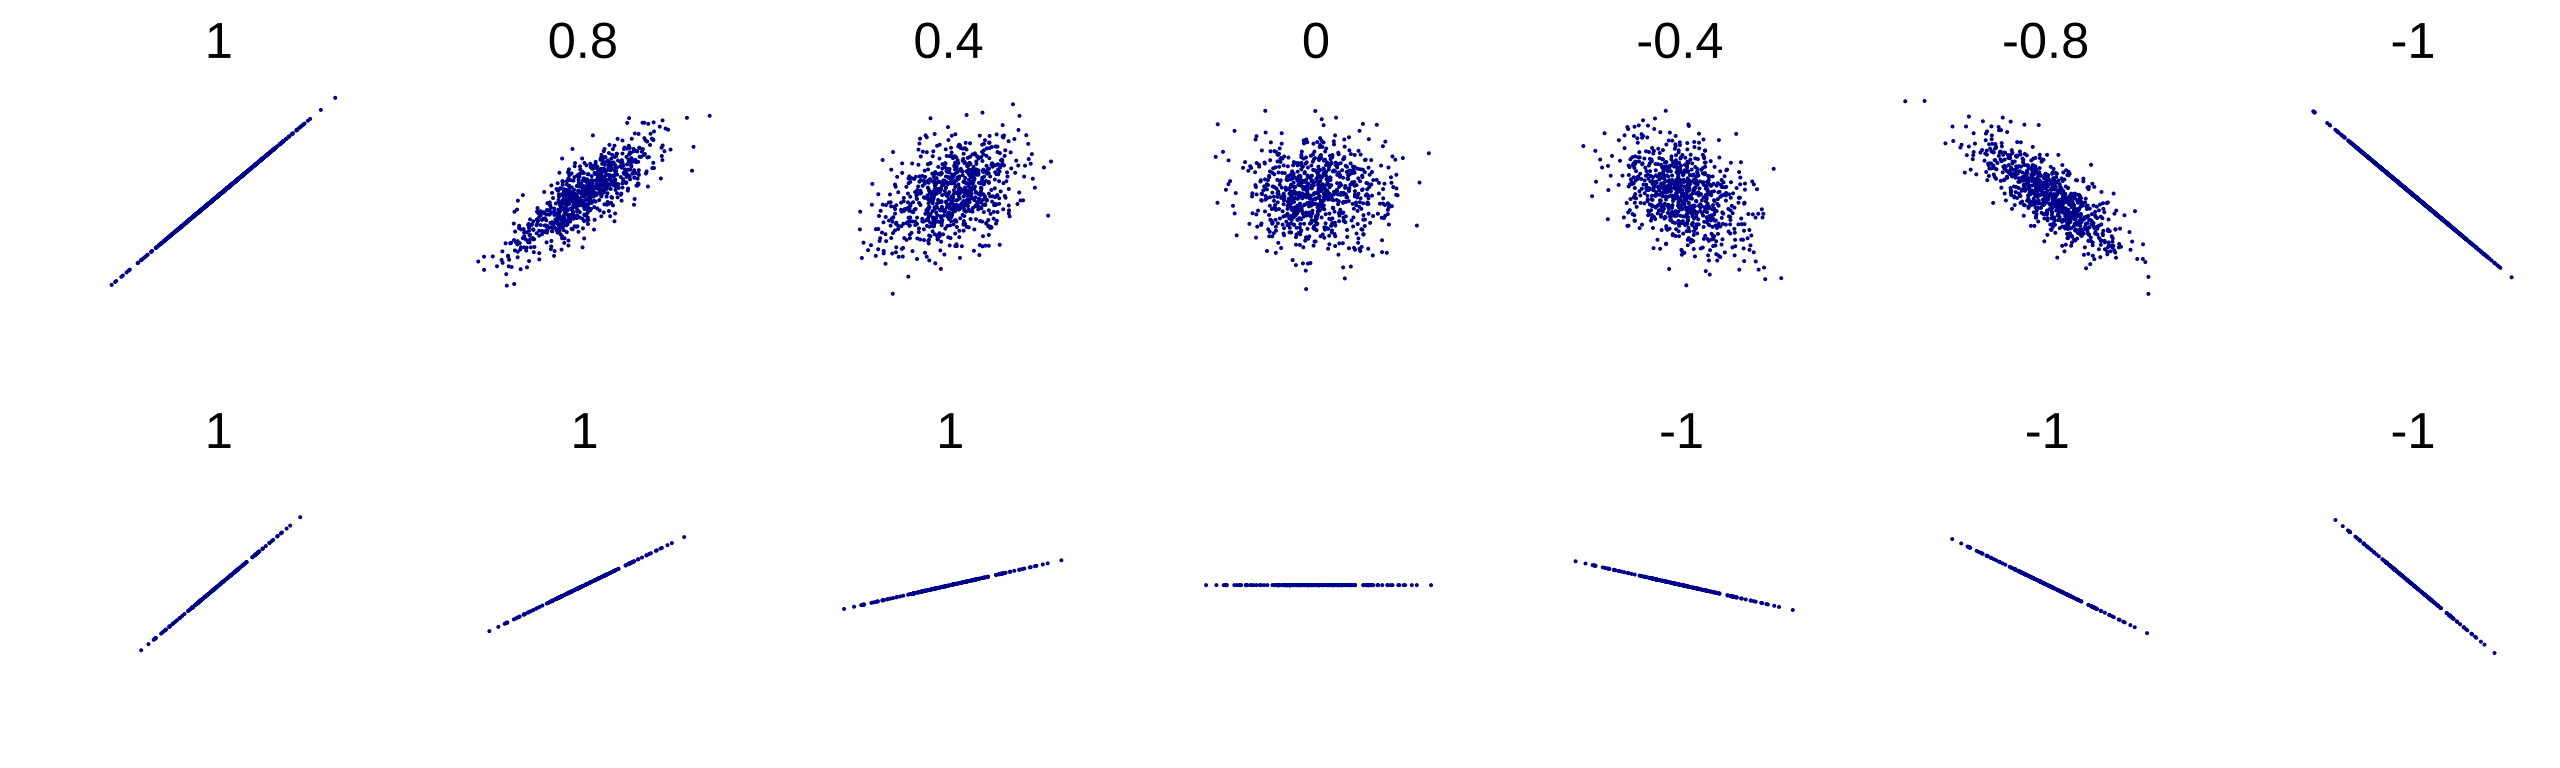

## Exercices

**QUESTION**
Relisez de plus près le tableau des corrélations entre les dimensions des pétales et sépales.

Remarquez que la *diagonale* est toujours à `+1`. Expliquez pourquoi.

**RÉPONSE**

La corrélation est à `+1` car la diagonale représente toujours une caractéristique avec elle-même.

Une corrélation entre $X$ et $Y$, ça indique à quel point augmenter l'une affecte l'autre.


- pour quelle sorte de plante la corrélation entre la largeur/longueur des sépales est-elle la plus forte

**QUESTION**

Si on s'intéresse à la caractéristique `petal_aire`, avec quelle autre colonne aura-t-elle le plus de corrélation, parmi :

1. `sepal_length`
2. `sepal_width`
3. `petal_length`
4. `petal_width`
5. `sepal_aire`

Affichez le tableau de corrélation entre toutes ces caractéristiques pour vérifier votre réponse

In [ ]:
#@title Exercice 14
iris6[['petal_aire', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'sepal_aire']].corr()

,petal_aire,sepal_length,sepal_width,petal_length,petal_width,sepal_aire
petal_aire,1.000000,0.851056,-0.266193,0.956169,0.979425,0.457768
sepal_length,0.851056,1.000000,-0.096305,0.866096,0.808421,0.683512
sepal_width,-0.266193,-0.096305,1.000000,-0.412697,-0.347966,0.655032
petal_length,0.956169,0.866096,-0.412697,1.000000,0.960165,0.360630
petal_width,0.979425,0.808421,-0.347966,0.960165,1.000000,0.367760
sepal_aire,0.457768,0.683512,0.655032,0.360630,0.367760,1.000000


**RÉPONSE**

On devrait s'attendre à ce que la corrélation soit la plus forte entre `petal_aire` et l'une ou l'autre de `petal_width` et `petal_length`, car l'aire d'un pétale est directement calculée avec ces deux autres colonnes.

Il ne devrait pas y avoir de corrélation plus forte que ça avec les caractéristiques reliées aux sépales.

Le tableau affiché confirme (on est à presque 1 de corrélation avec ces deux colonnes: `0.96` et `0.98`)

## Calculer la corrélation sur du texte

Est-ce que la largeur des pétales nous aiderait à deviner on a quelle espèce de fleur, parmi `setosa`, `versicolor` et `virginica`?

Ou est-ce qu'on serait mieux de regarder la longueur des pétales? Celle des sépales?

On devrait pouvoir répondre à cette question en regardant la **corrélation** avec la caractéristique `species`.

&nbsp;

Cependant, si on essaie de demander la table de corrélation d'un `DataFrame` qui inclut des colonnes textuelles, on obtient une erreur :

```python
iris6.corr()
---------------------------------------------------------------------------

----> 1 iris6.corr()
ValueError: could not convert string to float: 'versicolor'
```

Ce qui ne veut *pas* dire que la notion de corrélation ne peut pas s'appliquer...

Plutôt : pour calculer des corrélations pour des caractéristiques textuelles, on doit d'abord **encoder cette caractéristique avec un nombre**. On va encore devoir modifier notre `DataFrame` pour y arriver.

### Encodage *One-Hot*

Comment pourrait-on représenter (`setosa`, `versicolor`, `virginica`) numériquement?

Une approche simple est d'**ajouter 3 nouvelles caractéristiques** à toutes les observations.

- `species_setosa` = 0 ou 1
- `species_versicolor` = 0 ou 1
- `species_virginica` = 0 ou 1

Cette approche est nommée **[one-hot](https://en.wikipedia.org/wiki/One-hot#Machine_learning_and_statistics)**, car pour une observation donnée, une seule valeur à la fois peut être à `1`. C'est la caractéristique "chaude".

On pourra alors calculer la corrélation entre les différentes caractéristiques et chaque sorte d'espèce.

**QUESTION** : Créez un nouveau `DataFrame` nommé `iris7` qui repart de `iris6` et qui ajoute ces 3 colonnes.

Affichez-le pour vérifier que ça donne bien :

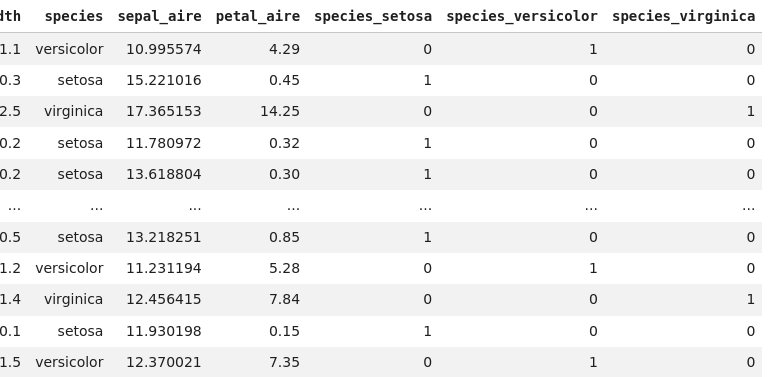

In [ ]:
#@title Exercice 15
iris7 = ...
######

# Solution avec une boucle:
species_setosa = []
species_versicolor = []
species_virginica = []

for i, ligne in iris6.iterrows():
  if ligne['species'] == 'setosa':
    species_setosa.append(1)
    species_versicolor.append(0)
    species_virginica.append(0)
  elif ligne['species'] == 'versicolor':
    species_setosa.append(0)
    species_versicolor.append(1)
    species_virginica.append(0)
  else:
    species_setosa.append(0)
    species_versicolor.append(0)
    species_virginica.append(1)

iris7 = iris6.assign(species_setosa=species_setosa)
iris7 = iris7.assign(species_versicolor=species_versicolor)
iris7 = iris7.assign(species_virginica=species_virginica)
display(iris7)

# Autre solution : en trichant un peu avec les opérateurs de python sur True/False
# true +  0 = 1
# false + 0 = 0
iris7 = iris6.assign(species_setosa=(iris6.species == 'setosa') + 0)
iris7 = iris7.assign(species_versicolor=(iris6.species == 'versicolor') + 0)
iris7 = iris7.assign(species_virginica=(iris6.species == 'virginica') + 0)
display(iris7)

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_aire,petal_aire,species_setosa,species_versicolor,species_virginica
0,5.6,2.5,3.9,1.1,versicolor,10.995574,4.29,0,1,0
1,5.1,3.8,1.5,0.3,setosa,15.221016,0.45,1,0,0
2,6.7,3.3,5.7,2.5,virginica,17.365153,14.25,0,0,1
3,5.0,3.0,1.6,0.2,setosa,11.780972,0.32,1,0,0
4,5.1,3.4,1.5,0.2,setosa,13.618804,0.30,1,0,0
...,...,...,...,...,...,...,...,...,...,...
145,5.1,3.3,1.7,0.5,setosa,13.218251,0.85,1,0,0
146,5.5,2.6,4.4,1.2,versicolor,11.231194,5.28,0,1,0
147,6.1,2.6,5.6,1.4,virginica,12.456415,7.84,0,0,1
148,4.9,3.1,1.5,0.1,setosa,11.930198,0.15,1,0,0


,sepal_length,sepal_width,petal_length,petal_width,species,sepal_aire,petal_aire,species_setosa,species_versicolor,species_virginica
0,5.6,2.5,3.9,1.1,versicolor,10.995574,4.29,0,1,0
1,5.1,3.8,1.5,0.3,setosa,15.221016,0.45,1,0,0
2,6.7,3.3,5.7,2.5,virginica,17.365153,14.25,0,0,1
3,5.0,3.0,1.6,0.2,setosa,11.780972,0.32,1,0,0
4,5.1,3.4,1.5,0.2,setosa,13.618804,0.30,1,0,0
...,...,...,...,...,...,...,...,...,...,...
145,5.1,3.3,1.7,0.5,setosa,13.218251,0.85,1,0,0
146,5.5,2.6,4.4,1.2,versicolor,11.231194,5.28,0,1,0
147,6.1,2.6,5.6,1.4,virginica,12.456415,7.84,0,0,1
148,4.9,3.1,1.5,0.1,setosa,11.930198,0.15,1,0,0


**QUESTIONS**

Créez ensuite un nouveau `DataFrame` nommé `iris8`, qui reprend celui que vous venez de créer mais qui enlève `species`.

Regardez la table de corrélations pour toutes les caractéristiques. En vous basant là-dessus, dites :

A) Si vous aviez une seule caractéristique à regarder pour essayer de deviner si une plante iris est de type *virginica*, laquelle utiliseriez-vous?

B) Si vous deviez plutôt à dire si une plante était de type *setosa* ou non, quelle caractéristique utiliseriez-vous?

In [ ]:
#@title Exercice 16
iris8 = ...
#####

# On enlève la colonne textuelle
iris8 = iris7.drop('species', axis='columns')
display(iris8.corr())

,sepal_length,sepal_width,petal_length,petal_width,sepal_aire,petal_aire,species_setosa,species_versicolor,species_virginica
sepal_length,1.000000,-0.096305,0.866096,0.808421,0.683512,0.851056,-0.701497,0.049329,0.629411
sepal_width,-0.096305,1.000000,-0.412697,-0.347966,0.655032,-0.266193,0.597356,-0.460615,-0.117362
petal_length,0.866096,-0.412697,1.000000,0.960165,0.360630,0.956169,-0.916631,0.171097,0.715798
petal_width,0.808421,-0.347966,0.960165,1.000000,0.367760,0.979425,-0.878836,0.084188,0.766137
sepal_aire,0.683512,0.655032,0.360630,0.367760,1.000000,0.457768,-0.107415,-0.289003,0.392933
petal_aire,0.851056,-0.266193,0.956169,0.979425,0.457768,1.000000,-0.805150,-0.047082,0.826112
species_setosa,-0.701497,0.597356,-0.916631,-0.878836,-0.107415,-0.805150,1.000000,-0.483779,-0.483779
species_versicolor,0.049329,-0.460615,0.171097,0.084188,-0.289003,-0.047082,-0.483779,1.000000,-0.531915
species_virginica,0.629411,-0.117362,0.715798,0.766137,0.392933,0.826112,-0.483779,-0.531915,1.000000


**RÉPONSES**

A) Selon la table de corrélations, on a que la corrélation entre `petal_aire` et `species_virginica` est de 0.83, ce qui est fort.

Seulement en connaissant l'aire des pétales, on devrait arriver à dire si une plante iris est une virginica ou pas.

B) Encore selon la table de corrélations, quand on regarde ce qui a une forte corrélation avec `species_setosa`, `petal_length` est à `-0.92`.

-0.92, ça veut dire une corrélation très forte, mais négative (donc quand `species_setosa` augmente en passant de 0 à 1, la longueur des pétales diminue).

Notez bien qu'une corrélation négative ne veut *pas* dire "pas de corrélation". C'est plutôt quand une corrélation est proche de 0 qu'il n'y a pas de lien entre les caractéristiques.

## Exercice

Avec le dernier `DataFrame` `iris8`, vérifiez la réponse donnée au dernier numéro.

Dessinez un nuage de points avec :

- `x=la colonne choisie au numéro A) prédécent` et `y=species_virginica`
- `x=la colonne choisie au numéro B) prédécent` et `y=species_setosa`

Regardez ces graphiques et essayez de dire : à partir de quelle valeur en `x` peut-on séparer les données en deux espèces?

In [ ]:
#@title Exercice 17.1
px.scatter(iris8, x='petal_aire', y='species_virginica')

In [ ]:
#@title Exercice 17.2
px.scatter(iris8, x='petal_length', y='species_setosa')

**RÉPONSES**

À l'oeil, on peut dire qu'une iris est de l'espèce *setosa* si quand `petal_length` est en bas de 2~3cm. On pourrait par exemple tracer la ligne à 2.5cm.

C'est un peu plus difficile de tracer une ligne exacte dans le cas de `petal_aire` pour le type *virginica*, mais on peut dire :

- Sous 7.5cm, ce n'est probablement pas une iris *virginica*
- Au-dessus de 8.8cm, c'est probablement une iris *virginica*
- Entre 7.5cm et 8.8cm, on ne sait pas avec certitude

## Carte thermique : visualiser un tableau de nombres

Un gros tableau de nombres peut facilement devenir mélangeant visuellement. Il faut être très attentif quand on regarde

Une solution à ce problème est de transformer le tableau en **carte thermique** (*heatmap*).

Plotly permet de faire ça rapidement avec :

In [ ]:
arr = np.zeros((10, 10))

# On génère un tableau 2D qui contient la table de multiplication de 1 à 10
for i in range(10):
  for j in range(10):
    arr[i, j] = (i+1) * (j+1)

df = pd.DataFrame(arr)
display(df)
px.imshow(df)

,0,1,2,3,4,5,6,7,8,9
0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
1,2.0,4.0,6.0,8.0,10.0,12.0,14.0,16.0,18.0,20.0
2,3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0,27.0,30.0
3,4.0,8.0,12.0,16.0,20.0,24.0,28.0,32.0,36.0,40.0
4,5.0,10.0,15.0,20.0,25.0,30.0,35.0,40.0,45.0,50.0
5,6.0,12.0,18.0,24.0,30.0,36.0,42.0,48.0,54.0,60.0
6,7.0,14.0,21.0,28.0,35.0,42.0,49.0,56.0,63.0,70.0
7,8.0,16.0,24.0,32.0,40.0,48.0,56.0,64.0,72.0,80.0
8,9.0,18.0,27.0,36.0,45.0,54.0,63.0,72.0,81.0,90.0
9,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0,100.0


On peut se servir de ça pour visualiser rapidement le tableau des corrélations entre les caractéristiques

In [ ]:
display((iris8.corr()))
px.imshow(iris8.corr())

,sepal_length,sepal_width,petal_length,petal_width,sepal_aire,petal_aire,species_setosa,species_versicolor,species_virginica
sepal_length,1.000000,-0.096305,0.866096,0.808421,0.683512,0.851056,-0.701497,0.049329,0.629411
sepal_width,-0.096305,1.000000,-0.412697,-0.347966,0.655032,-0.266193,0.597356,-0.460615,-0.117362
petal_length,0.866096,-0.412697,1.000000,0.960165,0.360630,0.956169,-0.916631,0.171097,0.715798
petal_width,0.808421,-0.347966,0.960165,1.000000,0.367760,0.979425,-0.878836,0.084188,0.766137
sepal_aire,0.683512,0.655032,0.360630,0.367760,1.000000,0.457768,-0.107415,-0.289003,0.392933
petal_aire,0.851056,-0.266193,0.956169,0.979425,0.457768,1.000000,-0.805150,-0.047082,0.826112
species_setosa,-0.701497,0.597356,-0.916631,-0.878836,-0.107415,-0.805150,1.000000,-0.483779,-0.483779
species_versicolor,0.049329,-0.460615,0.171097,0.084188,-0.289003,-0.047082,-0.483779,1.000000,-0.531915
species_virginica,0.629411,-0.117362,0.715798,0.766137,0.392933,0.826112,-0.483779,-0.531915,1.000000


## Exercice

On a vu plus haut qu'une corrélation **forte** ne dépend pas du signe + ou -.

Affichez le tableau de corrélation en valeur absolue, et mettez à zéro toutes les cases qui sont inférieures à 0.7 de corrélation absolue.

Mettez également tous les éléments de la diagonale à 0.

&nbsp;

Pour faire ces transformations, on va commencer par sortir les données du `DataFrame` et les reprendre dans un tableau 2D numpy.

Utilisez la base de code fournie ici :

In [ ]:
#@title Exercice 18
df_correlations = iris8.corr()
matrice = df_correlations.to_numpy()

... # TODO: Modifiez le tableau 2D numpy 'matrice'


# On remet la matrice dans un DataFrame
df_correlations = pd.DataFrame(matrice,
                               columns=df_correlations.columns,
                               index=df_correlations.index)
px.imshow(df_correlations)

#####
# Solution:

matrice = np.abs(matrice)
matrice[matrice < 0.7] = 0

# Mettre la diagonale à zéro, version avec une boucle:
for i in range(matrice.shape[0]):
  matrice[i, i] = 0

df_correlations = pd.DataFrame(matrice,
                               columns=df_correlations.columns,
                               index=df_correlations.index)
px.imshow(df_correlations)